In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def euler(f, a, b, yo, N):
    """
    Nos regresa la solución a un problema de valor inicial de ecuaciones diferenciales de primer grado
    mediante el metodo de euler, dentro de cierto rango [a,b], y f(0)=yo. 
    """
    h = (b-a)/N
    t = a
    w = yo
    ts_e = np.zeros(N+1)
    sol_e = np.zeros(N+1)
    
    for i in range(N):
        ts_e[i] = t
        sol_e[i] = w
        w = w + h*f(t, w)
        t = t + h
        
    ts_e[N] = t
    sol_e[N] = w
    
    return ts_e, sol_e

In [28]:
def funcion(t, y):
    """ecuacion diferencial a resolver"""
    return np.cos(t)/np.sin(y)

In [29]:
euler(funcion, 0, 1, 1, 10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.11883951, 1.2294454 , 1.33345295, 1.43174203,
        1.52474585, 1.61259724, 1.69520296, 1.77228289, 1.84339209,
        1.90793637]))

In [30]:
def taylor2(f, df, a, b, yo, N):
    """Nos regresa la solucion de la ecuacion diferencial usando el metodo de taylor con la serie de segundo grado"""
    h = (b-a)/N
    t = a
    w = yo
    ts_t2 = np.zeros(N+1)
    sol_t2 = np.zeros(N+1)
    
    for i in range(N):
        ts_t2[i] = t
        sol_t2[i] = w
        w = w + h*f(t, w) + h*h*df(t, w)/2
        t = t + h
        
    ts_t2[N] = t
    sol_t2[N] = w
    
    return ts_t2, sol_t2

In [31]:
def dfuncion(t, y):
    """Primera derivada de la funcion original"""
    return ( (-1)*np.sin(y)*np.sin(t) - np.cos(y)*(funcion(t,y))*np.cos(t)  )/(  (np.sin(y))**2 )

In [32]:
taylor2(funcion, dfuncion, 0, 1, 1, 10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.11430543, 1.22158312, 1.32284736, 1.41864131,
        1.50918839, 1.59447333, 1.67428673, 1.74825102, 1.81583849,
        1.8763897 ]))

In [33]:
def taylor3(f, df, d2f, a, b, yo, N):
    """
    Nos regresa la solucion de la ecuacion diferencial usando el metodo de taylor con la serie de tercer grado.
    """
    h = (b-a)/N
    t = a
    w = yo
    ts_t3 = np.zeros(N+1)
    sol_t3 = np.zeros(N+1)
    
    for i in range(N):
        ts_t3[i] = t
        sol_t3[i] = w
        w = w + h*(f(t, w) + h*(df(t, w)/2 + h*(d2f(t, w)/6)))
        t = t + h
        
    ts_t3[N] = t
    sol_t3[N] = w
    
    return ts_t3, sol_t3

In [34]:
def d2funcion(y, t):
    """Segunda derivada de la función"""
    return (np.cos(t)*(  (np.sin(y))**2 +  ((np.sin(y))**2)*(funcion(t,y)**2) + 2*(np.cos(y)**2)*(funcion(t,y)**2) - np.sin(y)*np.cos(y)*(dfuncion(t,y))   )  )/((np.sin(t)**3))


In [46]:
taylor3(funcion, dfuncion, d2funcion, 0.1, 1, 1, 10) ##  no me deja comenzarlo desde el 0 :c

(array([0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.  ]),
 array([1.        , 1.11201516, 1.20860652, 1.29858234, 1.38321279,
        1.46286463, 1.53760528, 1.6073318 , 1.67181665, 1.73073236,
        1.78367108]))

### La solución analítica tiene la forma $\arccos(-\sin(t) + \cos(1))$

In [40]:
def solexacta(t):
    return np.arccos(-np.sin(t) + np.cos(1))

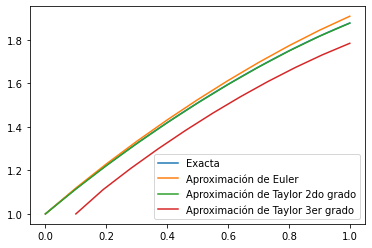

In [44]:
ts = np.linspace(0,1,100)

plt.plot(ts, solexacta(ts), label='Exacta')
plt.plot(*euler(funcion, 0, 1, 1, 10),label='Aproximación de Euler')
plt.plot(*taylor2(funcion, dfuncion, 0, 1, 1, 10),label='Aproximación de Taylor 2do grado')
plt.plot(*taylor3(funcion, dfuncion, d2funcion, 0.1, 1, 1, 10),label='Aproximación de Taylor 3er grado')
plt.legend()

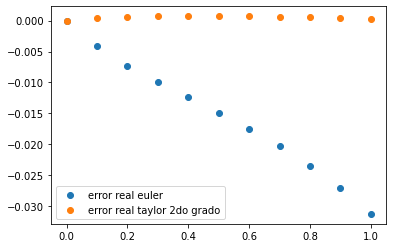

In [59]:
N = 10
h = 1/N
ts, sol1 = euler(funcion, 0,1,1,N)
ts, sol2 = taylor2(funcion,dfuncion,0,1,1,N)
plt.scatter(ts, solexacta(ts) - sol1, label='error real euler')
plt.scatter(ts, solexacta(ts) - sol2, label='error real taylor 2do grado')
plt.legend()

#### El resultado no era esperado ya que, uno puede suponer que mientras más alto es el grado del polinomio de Taylor, más precisión tendrá la aproximación, lo que no se vió en este caso.